# Nuclei Detect  demo

This notebook can be used to predict cells and nuclei given one has the sufficient model and data

In [111]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import random
#import requests
from io import BytesIO
from PIL import Image
import numpy as np
import os
import cv2
from matplotlib.image import imread


Those are the relevant imports for the detection model

In [112]:
from maskrcnn_benchmark.config import cfg
pylab.rcParams['figure.figsize'] = 20, 12

# importing the prediction class
from predictor import NUCLEIdemo

The NUCLEIdemo class can load the config file and does the image prediction.

In [113]:
configuration_file = "../configs/nuclei_1gpu_nonorm_offline.yaml"
configuration_file = "/home/max/github/nuclei_cell_detect/configs/nuclei_1gpu_nonorm_offline.yaml"
# update the config options with the config file
cfg.merge_from_file(configuration_file)

# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

# change dimensions of test images
cfg.merge_from_list(['INPUT.MAX_SIZE_TEST','2049'])

# change number of classes
cfg.merge_from_list(['MODEL.ROI_BOX_HEAD.NUM_CLASSES','4'])

# change normalization, here model was not normalized
cfg.merge_from_list(['INPUT.PIXEL_MEAN', [0., 0., 0.]])

# define model to use here
#cfg.merge_from_list(['MODEL.WEIGHT', '/home/maxsen/DEEPL/models_new/20190313_offline_augment/model_final.pth'])

# define how many objects can be identified per image
cfg.merge_from_list(['TEST.DETECTIONS_PER_IMG', '120'])

# show the configuration
#print(cfg)

Change the confidence threshold.

In [114]:
# load image
def load(path):
    pil_image = Image.open(path).convert("RGB")
    #print(pil_image)
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def load_matplot(path):
    img = imread(path)
    return img

def load_cv2(path):
    img = cv2.imread(path,cv2.IMREAD_ANYDEPTH)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    img = cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)
    img = np.uint8(img)
    #img = cv2.convertScaleAbs(img)
    return img
'''
    >>> img = np.empty((100,100,1),dtype = np.uint16)
>>> image = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

>>> cvuint8 = cv2.convertScaleAbs(image)

>>> cvuint8.dtype
dtype('uint8')
    
'''

# show image alongside the result and save if necessary
def imshow(img, result, save_path=None):
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(img)
    plt.axis('off')
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches = 'tight')
        plt.show()
    else:
        plt.show()
        
def imshow_single(result, save_path=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.imshow(result)
    plt.axis('off')
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

Let's define a few helper functions for loading images from a URL

In [115]:
nuclei_detect = NUCLEIdemo(
    cfg,
    min_image_size=1024,
    confidence_threshold=0.7,
)

### Define the image paths and show the results

<class 'numpy.ndarray'>
(2048, 2048, 3)
uint8
<class 'numpy.ndarray'>
(2048, 2048, 3)
uint8


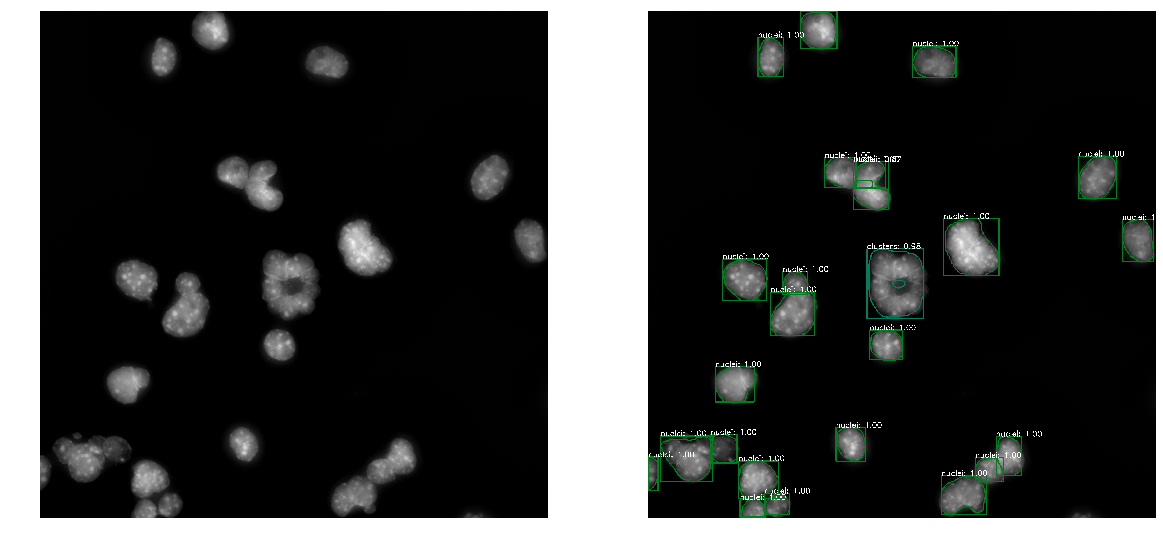

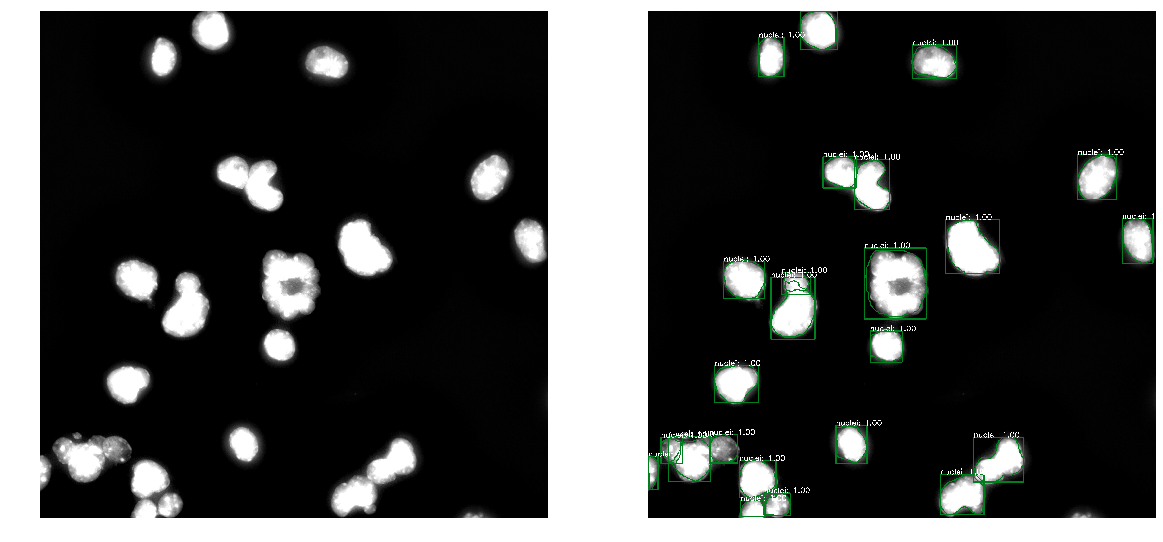

{'bbox': tensor([[4.4606e+02, 1.0999e+02, 5.4846e+02, 2.6951e+02],
        [8.9548e+02, 1.2941e+03, 1.0248e+03, 1.4208e+03],
        [3.7321e+02, 1.9772e+03, 4.7258e+02, 2.0415e+03],
        [7.5743e+02, 1.6749e+03, 8.8239e+02, 1.8288e+03],
        [1.0861e+00, 1.7999e+03, 4.0612e+01, 1.9348e+03],
        [2.6829e+02, 1.4339e+03, 4.4597e+02, 1.5820e+03],
        [8.7163e+02, 9.5934e+02, 1.1215e+03, 1.2451e+03],
        [8.1276e+01, 1.7184e+03, 2.5308e+02, 1.9001e+03],
        [5.2119e+01, 1.7238e+03, 1.3835e+02, 1.8286e+03],
        [1.0651e+03, 1.4172e+02, 1.2429e+03, 2.7655e+02],
        [7.0536e+02, 5.9121e+02, 8.3957e+02, 7.1775e+02],
        [1.9118e+03, 8.4060e+02, 2.0358e+03, 1.0209e+03],
        [4.9511e+02, 1.0776e+03, 6.7311e+02, 1.3276e+03],
        [2.4694e+02, 1.7121e+03, 3.6075e+02, 1.8260e+03],
        [1.1787e+03, 1.8716e+03, 1.3549e+03, 2.0343e+03],
        [1.7322e+03, 5.8329e+02, 1.8897e+03, 7.6329e+02],
        [6.1342e+02, 4.7253e+00, 7.6244e+02, 1.5871e+02],
     

In [116]:
#img_path = '../../ms2/ssss/'
#img_path = '/data/proj/smFISH/Students/Max_Senftleben/files/data/20190309_aug_pop/ss/'
img_path = '/data/proj/smFISH/Simone/test_intron/AMEXP20181106/AMEXP20181106_hyb1/test_run_20181123_AMEXP20181106_hyb1_filtered_png/test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'

# random image is taken from the image path
random_img = random.choice(os.listdir(img_path))
random_img = 'AMEXP20181106_hyb1_DAPI_pos_0.png'
image = load(img_path + random_img)
image_matplot = load_matplot(img_path + random_img)
image_cv2 = load_cv2(img_path + random_img)

print(type(image_cv2))
print(image_cv2.shape)
print(image_cv2.dtype)

print(type(image))
print(image.shape)
print(image.dtype)
# results are computed


result, prediction = nuclei_detect.run_on_opencv_image(image_cv2)
imshow(image_cv2, result)

result, predictions = nuclei_detect.run_on_opencv_image(image)
imshow(image, result)
#print(pil_image)
# convert to BGR format
#image = np.array(pil_image)[:, :, [2, 1, 0]]

print(vars(predictions))


In [117]:
def make_numpy(prediction, image, path):
    list_masks = vars(prediction)['extra_fields']['mask']
    masks_to_save = []
    img = np.squeeze(np.dsplit(image,3)[0], axis=2)
    masks_to_save.append(img)
    # iterate through the list of masks
    for i, label in enumerate(vars(prediction)['extra_fields']['labels']):
        numpy_mask = list_masks[i].numpy().transpose(1,2,0)
        numpy_mask = np.squeeze(numpy_mask, axis=2)
        numpy_mask[numpy_mask > 0] = label
        
        masks_to_save.append(numpy_mask)
    
    np.save(path, np.dstack(masks_to_save))
    

In [97]:
# predict for a folder of images
img_path = '/data/proj/smFISH/Simone/test_intron/AMEXP20181106/AMEXP20181106_hyb1/test_run_20181123_AMEXP20181106_hyb1_filtered_png/test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'
save_results = '/data/proj/smFISH/Students/Max_Senftleben/files/results/'
save_independently = save_results + '20190329_test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_png/'
save_npy = save_results + '20190329_test_run_20181123_AMEXP20181106_hyb1_DAPI_filtered_npy/'

# done on cpu to check if there is a difference in prediction
save_independently_cpu = '/data/proj/smFISH/Students/Max_Senftleben/files/results/20190331_AMEXP20181106_DAPI_filtered_predicted_with_cpu/'

for one_image in os.listdir(img_path):
    print("Image {} is handled.".format(one_image))
    image = load_cv2(img_path + one_image)
    
    # normalization ca be applied
    result, prediction = nuclei_detect.run_on_opencv_image(image)
    img = Image.fromarray(result)
    img.save(save_independently + one_image[:-4] + '_pred.png')
    make_numpy(prediction, image, save_npy + one_image[:-4] + '_pred.npy')
    #imshow(image, result)

Image AMEXP20181106_hyb1_DAPI_pos_13.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_8.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_1.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_12.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_14.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_7.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_4.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_3.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_11.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_9.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_6.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_10.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_2.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_5.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_0.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_28.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_27.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_23.png is handled.
Image AMEXP20181106_hyb1_DAPI_pos_29.png is handled.
Ima

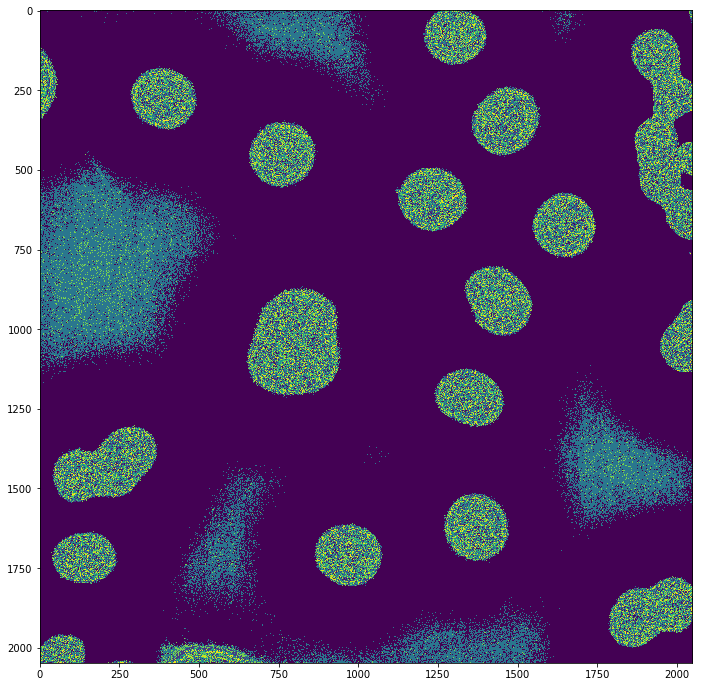

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

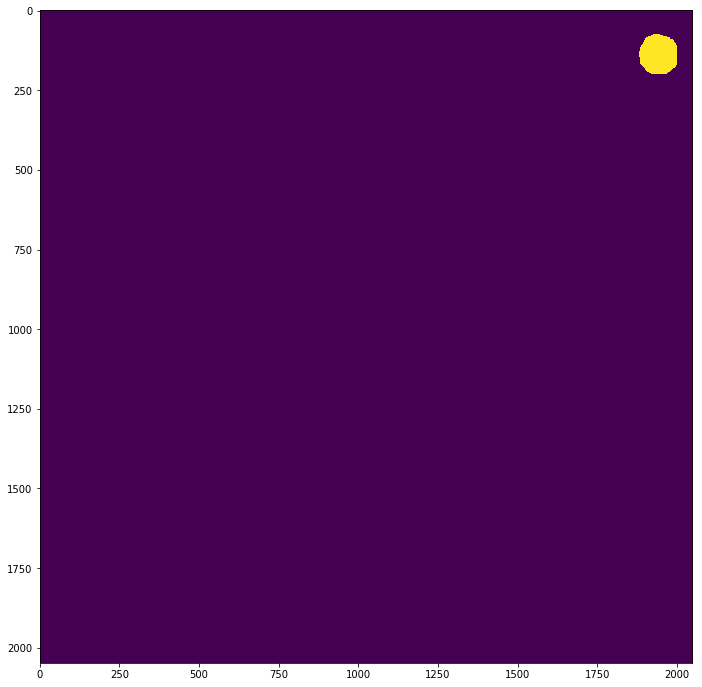

[0 1]


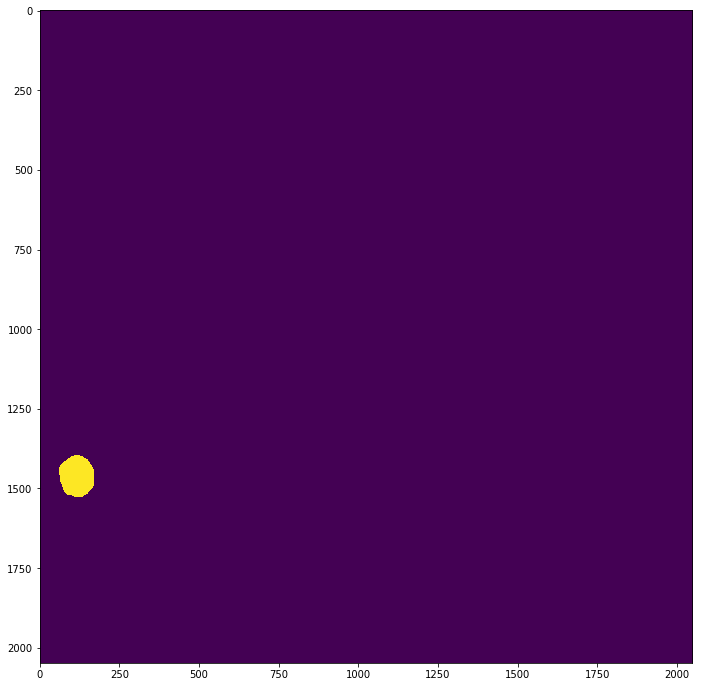

[0 1]


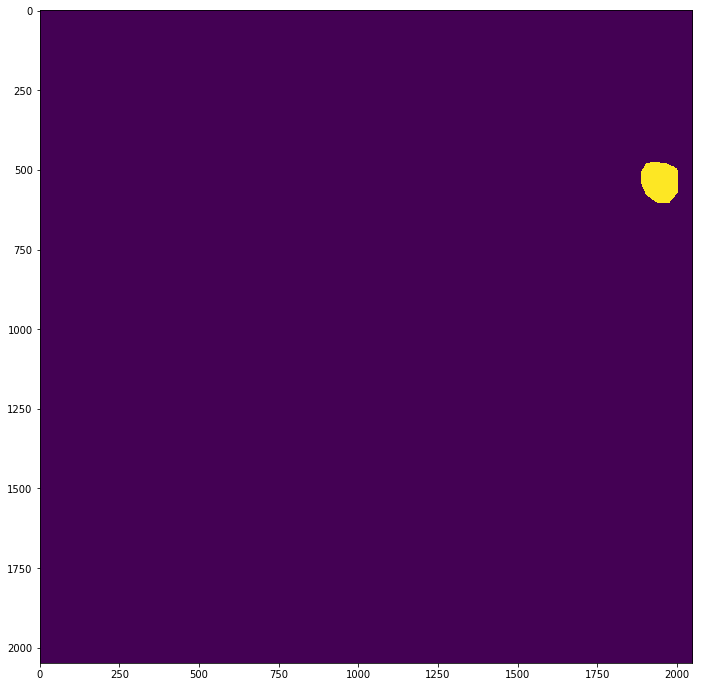

[0 1]


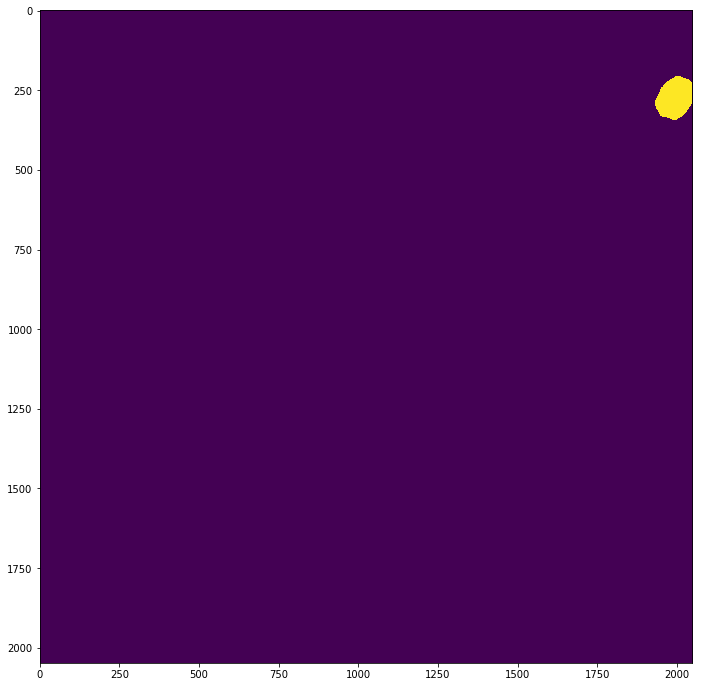

[0 1]


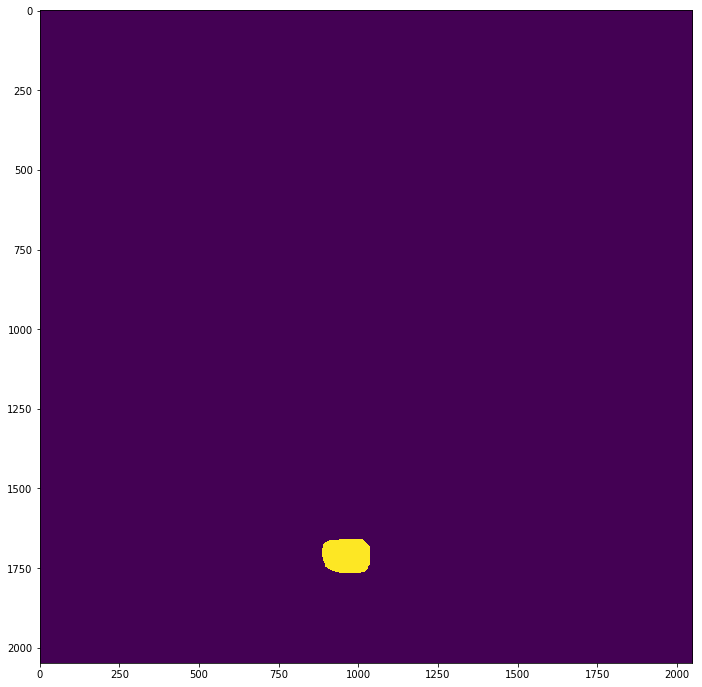

[0 1]


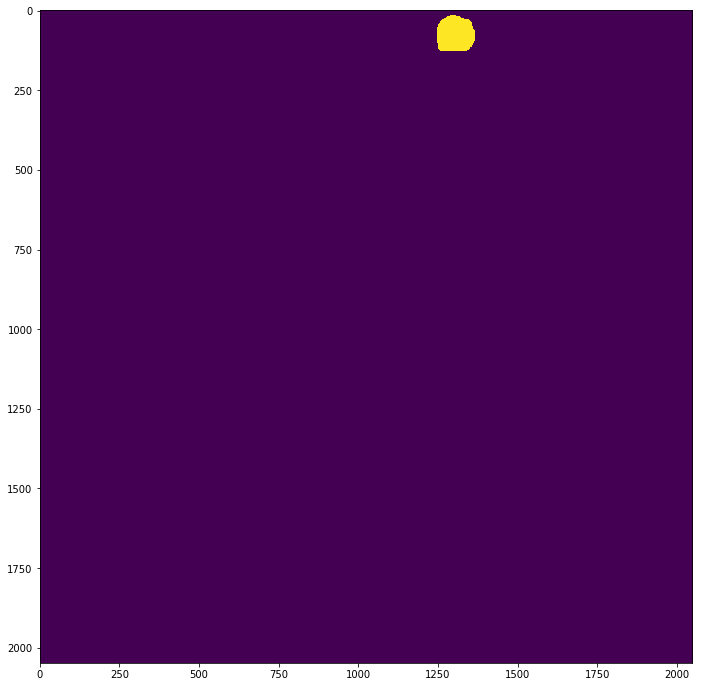

[0 1]


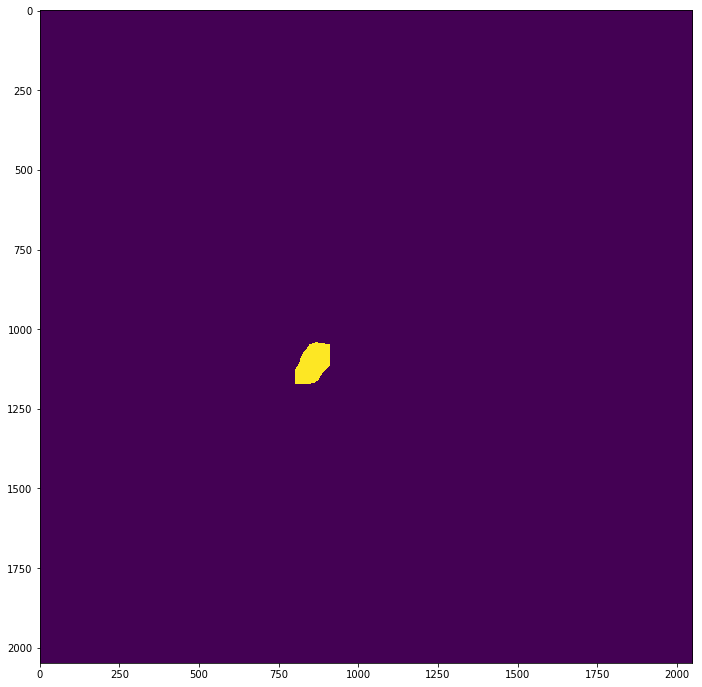

[0 1]


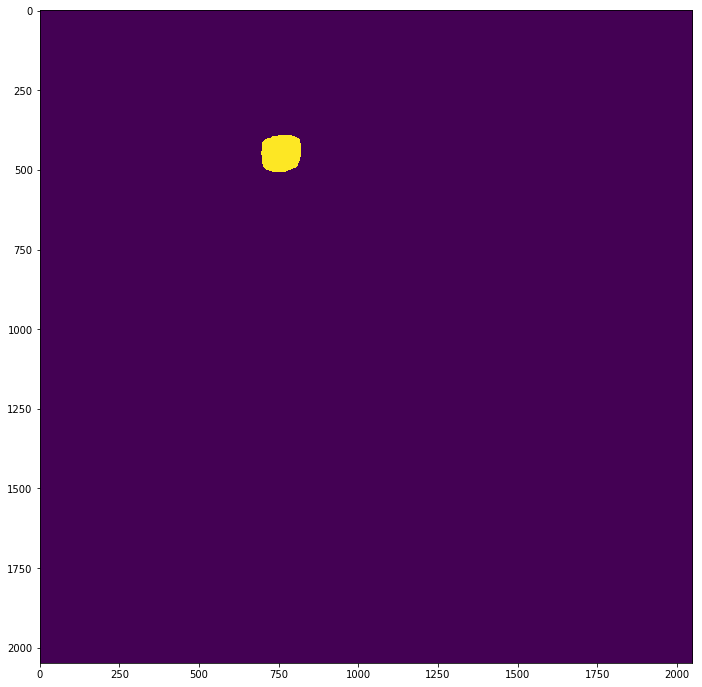

[0 1]


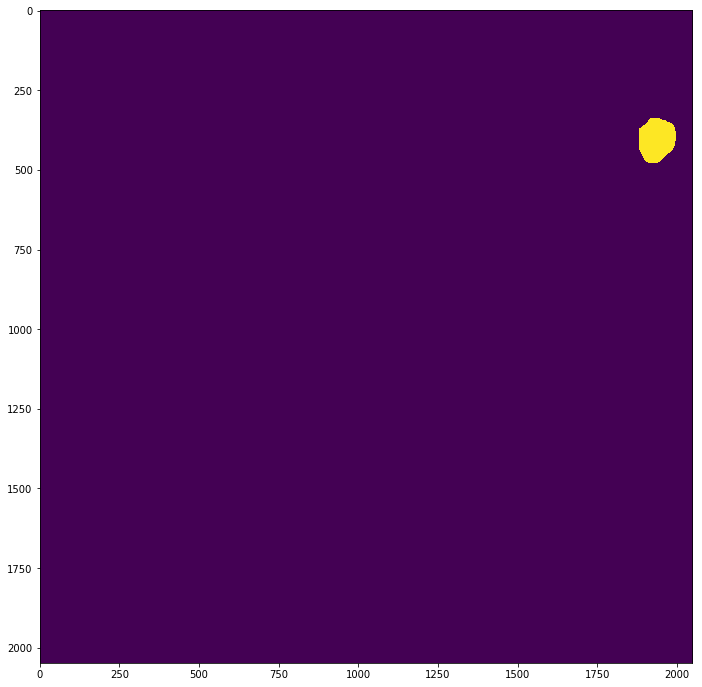

[0 1]


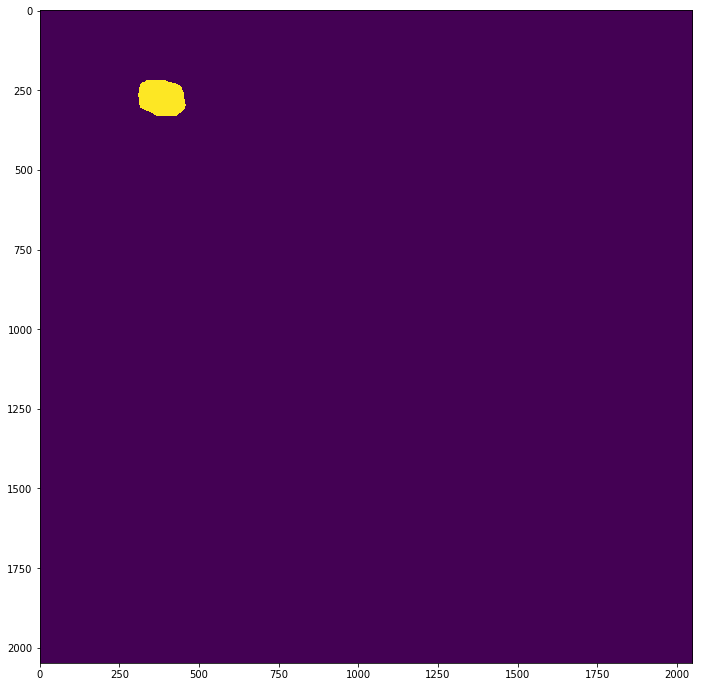

[0 1]


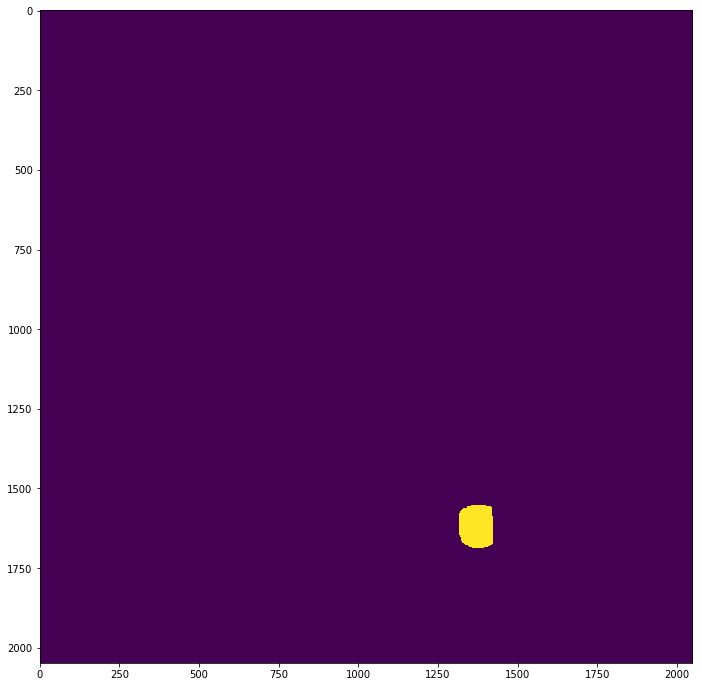

[0 1]


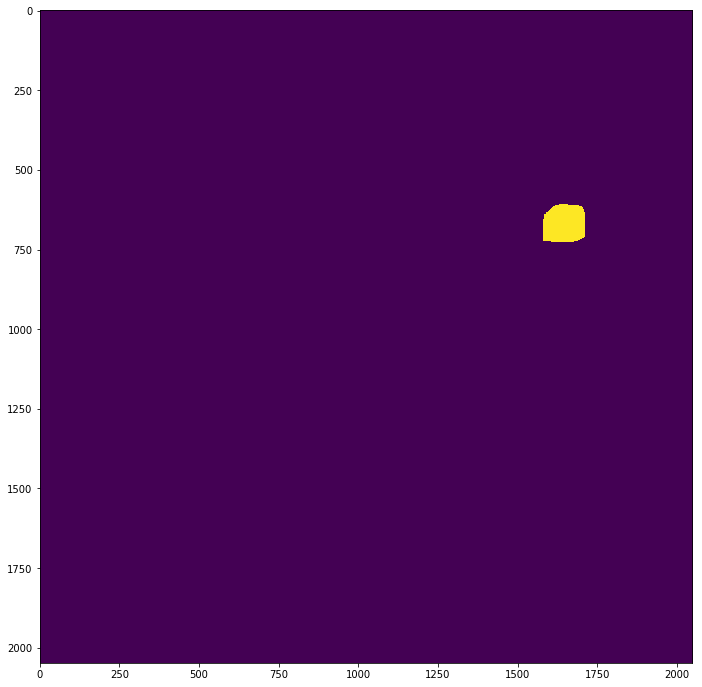

[0 1]


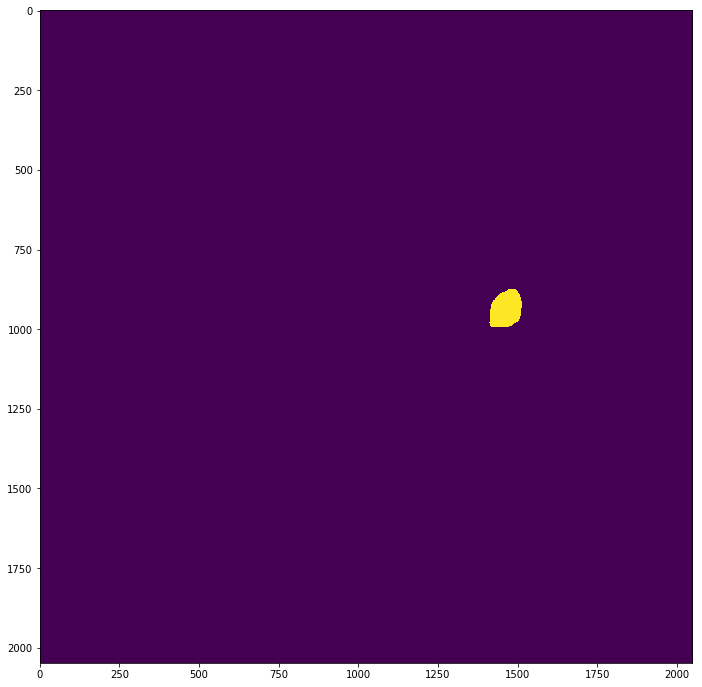

[0 1]


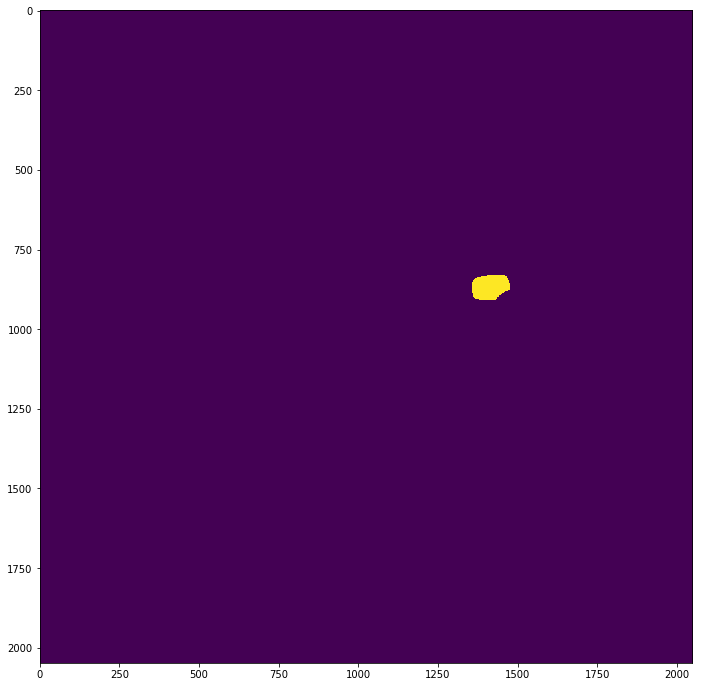

[0 1]


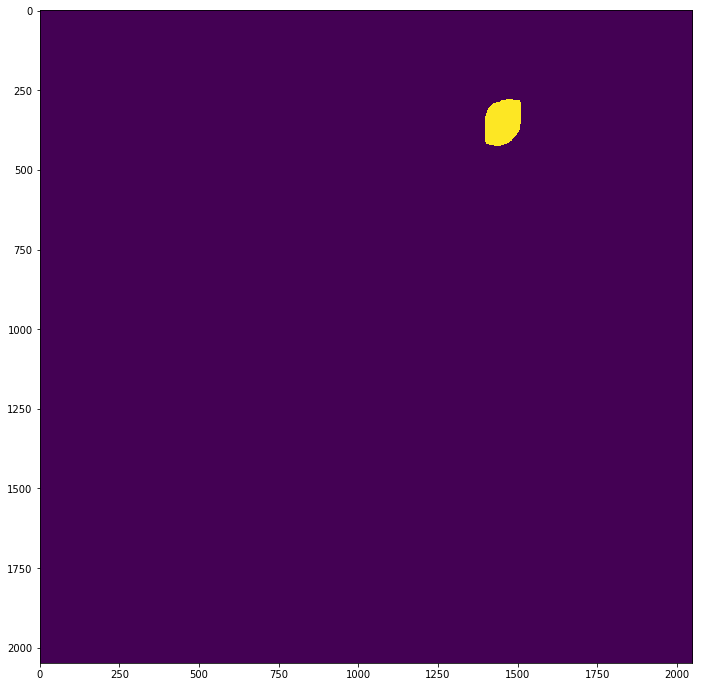

[0 1]


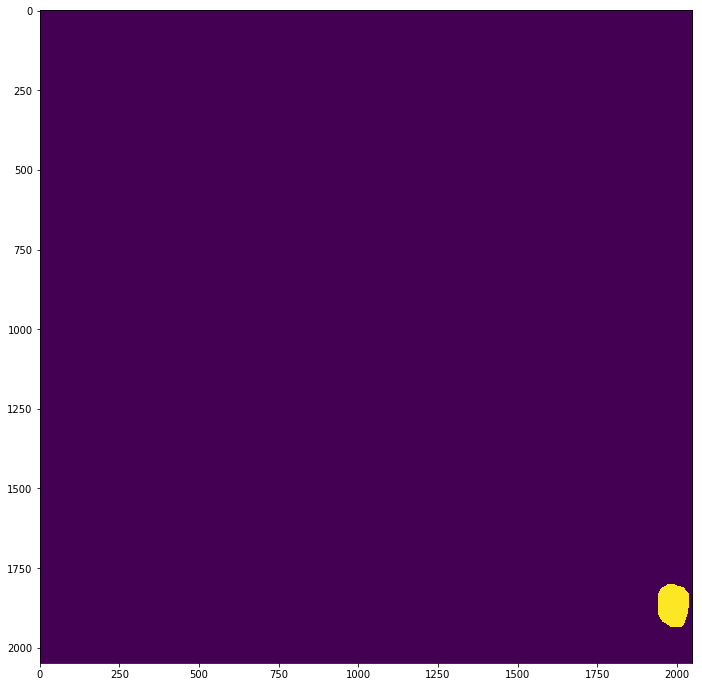

[0 1]


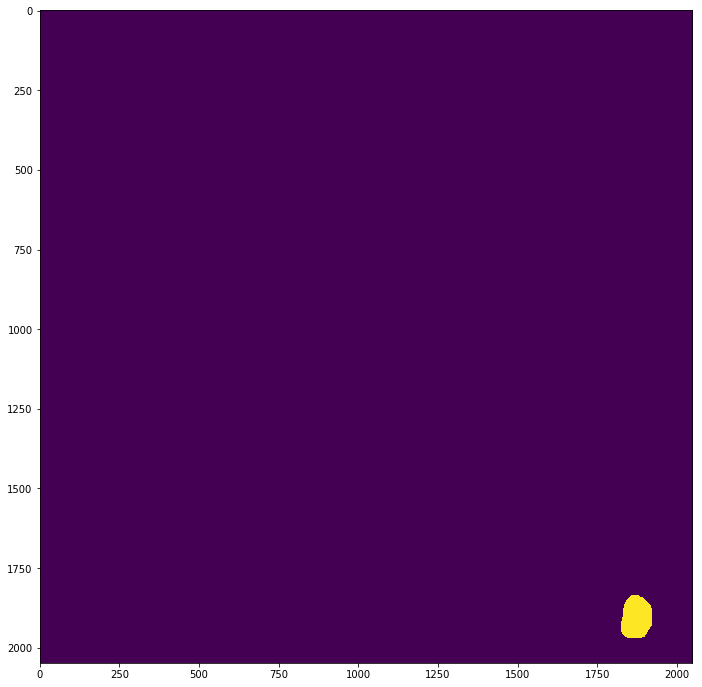

[0 1]


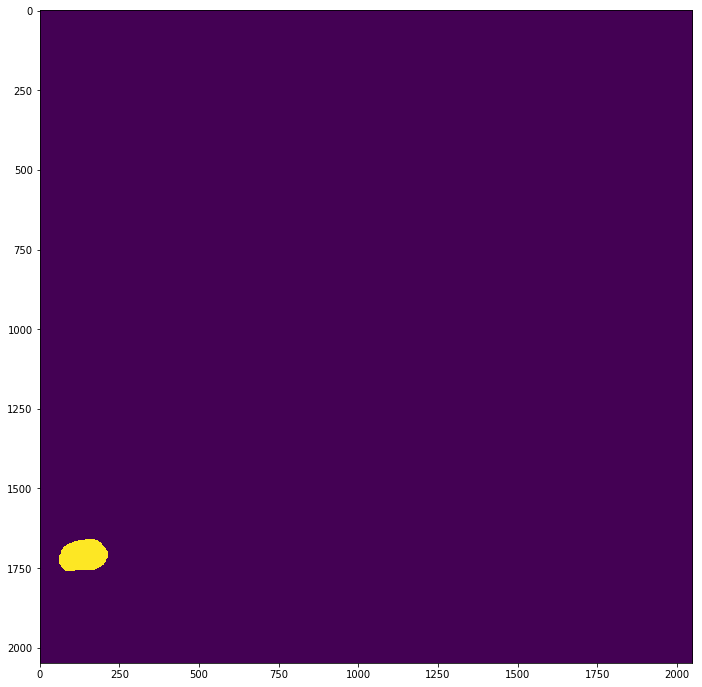

[0 1]


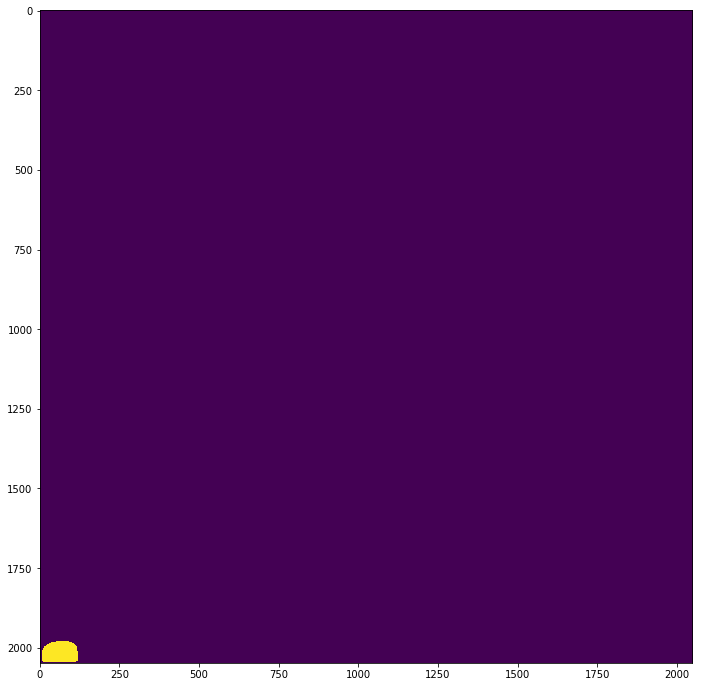

[0 1]


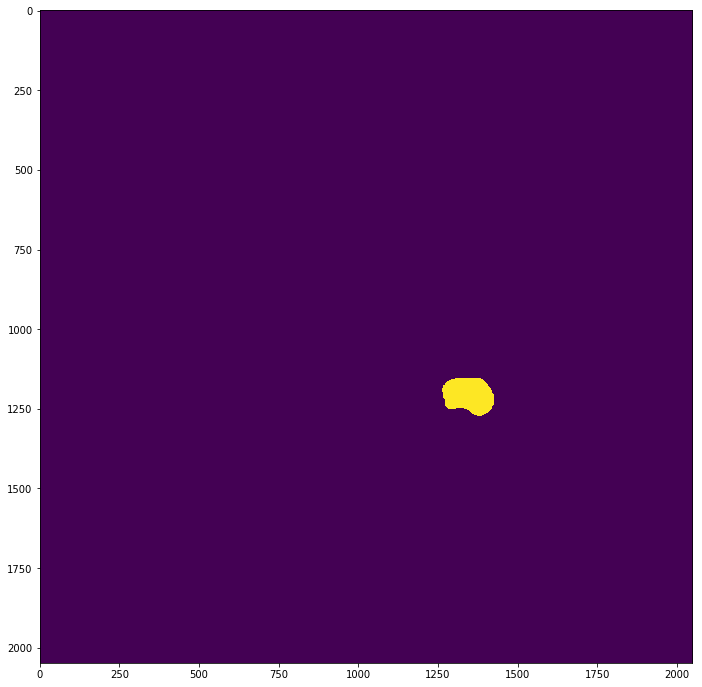

[0 1]


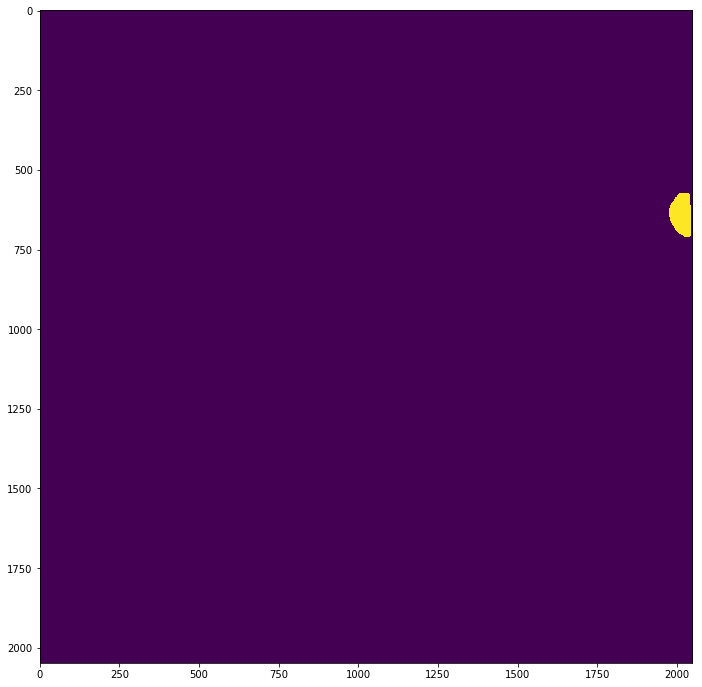

[0 1]


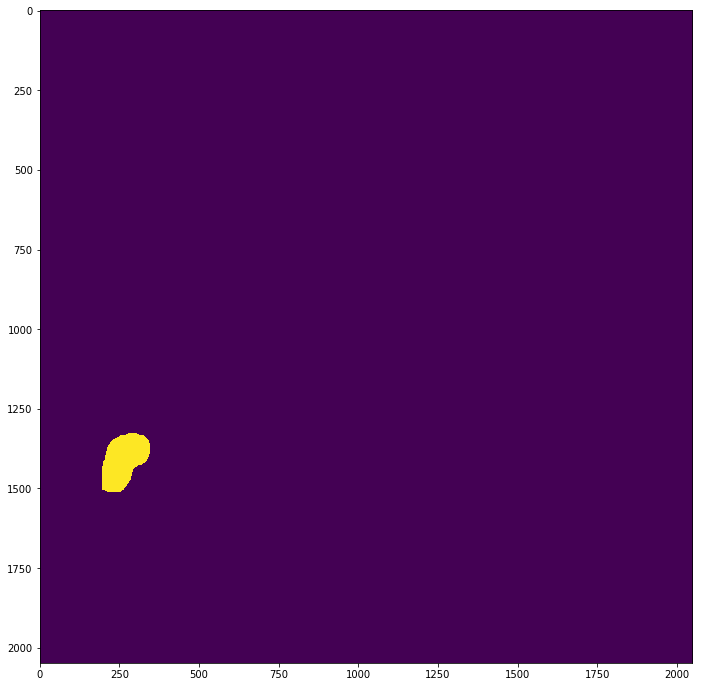

[0 1]


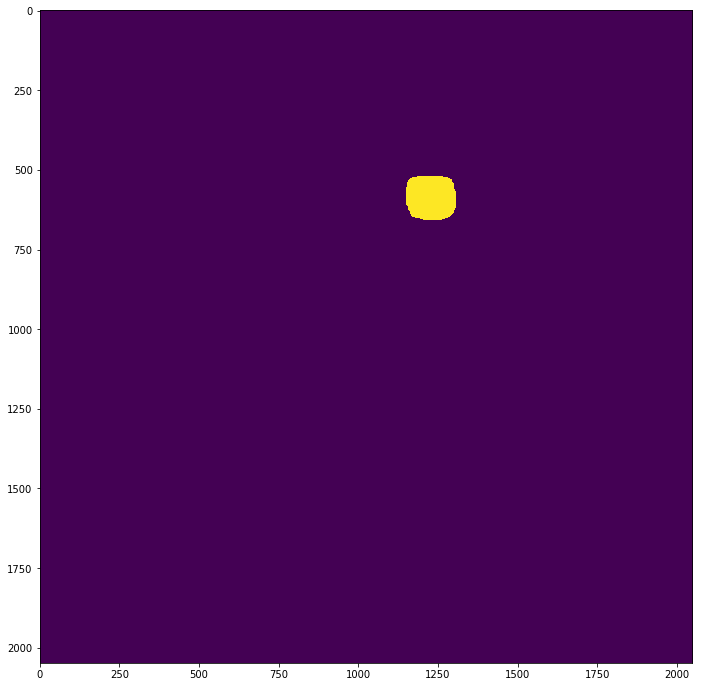

[0 1]


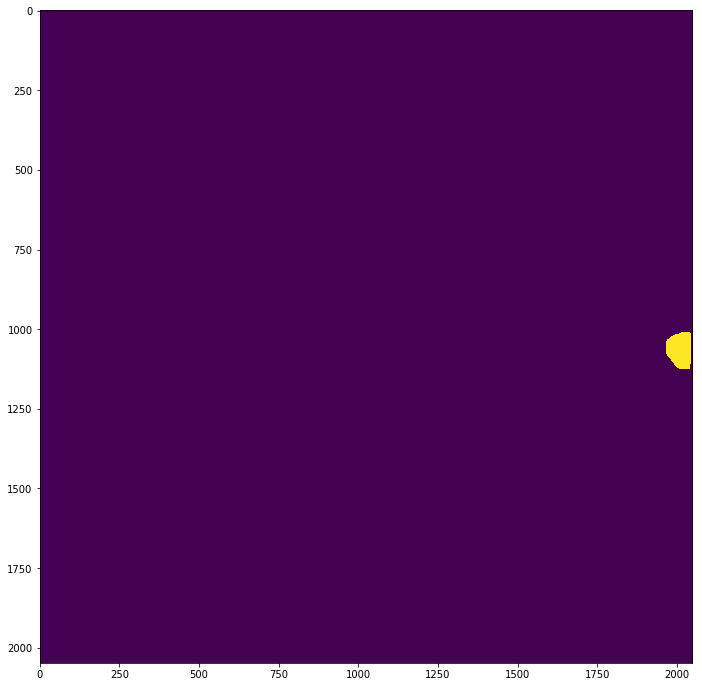

[0 1]


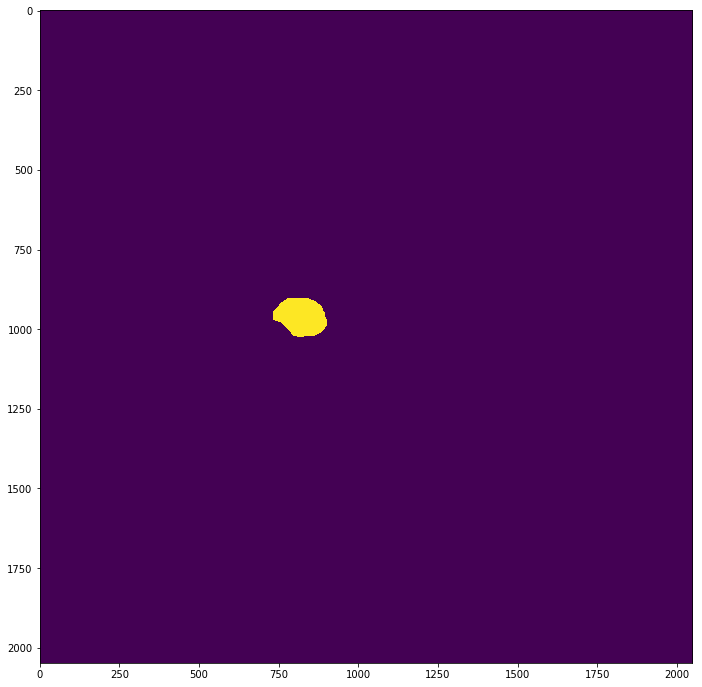

[0 1]


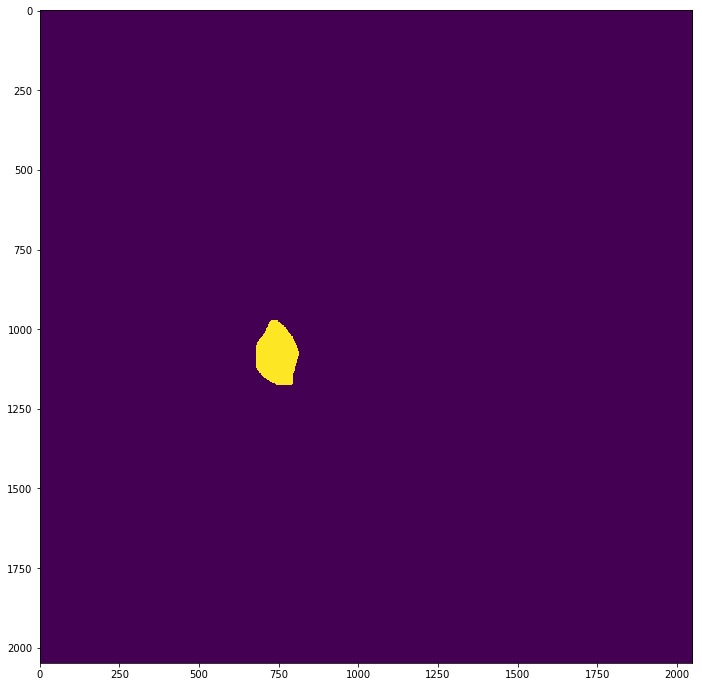

[0 1]


In [96]:
make_numpy(prediction, image_cv2, 'test.npy')

random_img = random.choice(os.listdir(save_npy))
mask = np.load(save_npy+random_img)
mask_list = np.dsplit(mask, mask.shape[2])
for i in mask_list:
    plt.imshow(np.squeeze(i, axis=2)*100)
    plt.show()
    print(np.unique(i))